In [1]:
class DisjointSets(object):
    def __init__(self,n):
        self.sets = [-1]*n
        self.counter = n
    def parent(self,i):
        while True:
            j = self.sets[i]
            if j<0:
                return i
            i = j
    def join(self,i,j):
        i,j = self.parent(i),self.parent(j)
        if i!=j:
            self.sets[i] += self.sets[j]
            self.sets[j] = i
            return True
        return False
    def joined(self,i,j):
        return self.parent(i) == self.parent(j)
    def __len__(self):
        return self.counter
    

In [2]:
import random

def make_mage(n,d):
    walls = [(i,i+n**j) for i in range(n**2) for j in range(d) if (i/n**j)%n+1 < n]
    torn_down_walls =[]
    ds = DisjointSets(n**d)
    random.shuffle(walls)
    for i,wall in enumerate(walls):
        if ds.join(wall[0],wall[1]):
            torn_down_walls.append(wall)
        if len(ds) ==1:
            break
    walls = [wall for wall in walls if not wall in torn_down_walls]
    return walls, torn_down_walls
    

In [70]:
walls, torn_down_walls = make_mage(n=20,d=2)

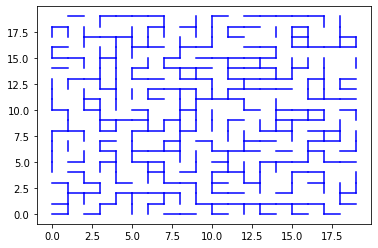

In [76]:
import matplotlib.pyplot as plt
import numpy as np

n = 20;

p = np.array(walls)
point = np.zeros(shape=(p.shape[0],4), dtype=np.int64)
                         

for i in range(p.shape[0]):
    if p[i,1] - p[i,0] == 1:
        p[i,1] = 1
        point[i,0] = p[i,0] % n 
        point[i,1] = p[i,0] / n 
        point[i,2] = point[i,0] +1 
        point[i,3] = point[i,1]      
        

        
    else:
        p[i,1] = -1
        point[i,0] = p[i,0] % n 
        point[i,1] = p[i,0] / n 
        point[i,2] = point[i,0]
        point[i,3] = point[i,1] +1
        
for i in range(point.shape[0]):
    plt.plot([point[i,0], point[i,2]], [point[i,1], point[i,3]],color="blue")
    

p = np.array(torn_down_walls)
point = np.zeros(shape=(p.shape[0],4), dtype=np.int64)

                         
                         

for i in range(p.shape[0]):
    if p[i,1] - p[i,0] == 1:
        p[i,1] = 1
        point[i,0] = p[i,0] % n 
        point[i,1] = p[i,0] / n 
        point[i,2] = point[i,0] +1 
        point[i,3] = point[i,1]      
        

        
    else:
        p[i,1] = -1
        point[i,0] = p[i,0] % n 
        point[i,1] = p[i,0] / n 
        point[i,2] = point[i,0]
        point[i,3] = point[i,1] +1
        
for i in range(point.shape[0]):
    x = 1
    #plt.plot([point[i,0], point[i,2]], [point[i,1], point[i,3]],color="red")
    
plt.show()






